In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine_df = pd.read_csv('Wine_quality.csv')

In [3]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [5]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

## First of all let's check the count of quality of the wine in the given dataset

In [6]:
wine_df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

<AxesSubplot: xlabel='quality', ylabel='count'>

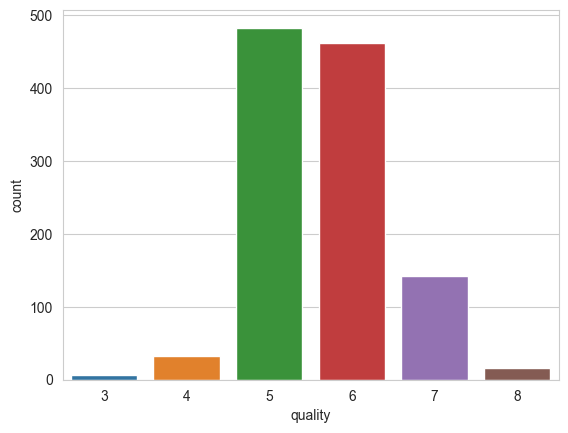

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='quality', data=wine_df)

Inference : <br>The Maximum quality of wine in the given dataset is 8.
            <br>The Minimum quality of wine in the given dataset is 3
            <br>Majority of the wine is of Quality 5 & 6

## Let's Use Line Chart For Analysis

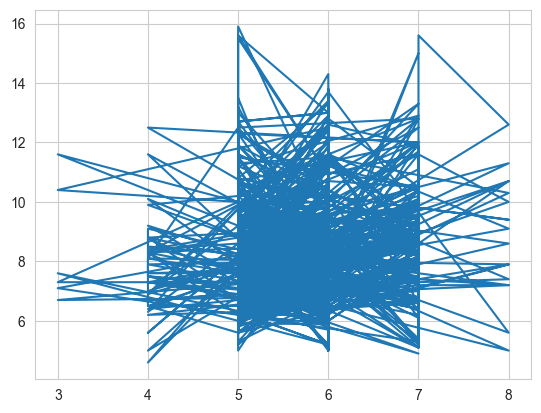

In [8]:
plt.plot(wine_df.quality, wine_df['fixed acidity'])

Inference :<br>
Cannot Use Line Chart because it `Impossible` to make an Inference from the above line Chart due to very large values of each parameter in the data set.

<hr><hr>

## Let's Draw Bar chart to analyse

### Parameter 1 : Id

In [9]:
id_df = [[wine_df[wine_df['quality'] ==3].Id.mean()], 
         [wine_df[wine_df['quality'] ==4].Id.mean()], 
         [wine_df[wine_df['quality'] ==5].Id.mean()],
         [wine_df[wine_df['quality'] ==6].Id.mean()],
         [wine_df[wine_df['quality'] ==7].Id.mean()],
         [wine_df[wine_df['quality'] ==8].Id.mean()]]
id_df

[[1121.1666666666667],
 [692.8484848484849],
 [753.9254658385094],
 [854.6255411255411],
 [830.3496503496503],
 [797.875]]

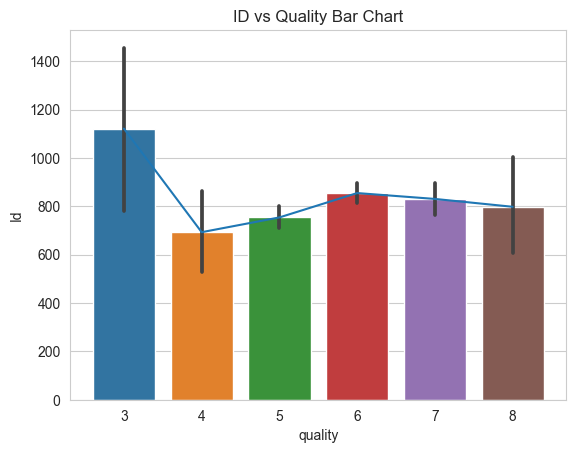

In [10]:
sns.barplot(y='Id', x='quality', data = wine_df);
plt.plot(id_df);
plt.title("ID vs Quality Bar Chart");

Parameter 'Id' does not affect the quality as it can be seen from the bar chart, the values of Id don't show a fixed pattern which can be usefull for the quality prediction. Moreover Id is something which does not affect the prepration of the wine, it can be changed even after a specific wine has been made.

#### Bar Chart seems to be usefull
<hr>

## Analysing the affect of acidic character of the wine on the overall Quality

### Parameter 2 : `fixed acidity`

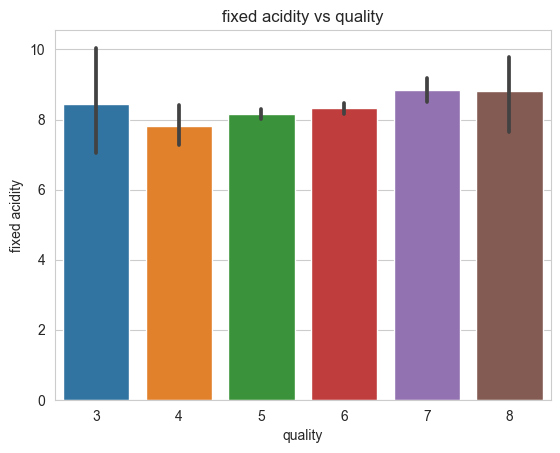

In [11]:
sns.barplot(y='fixed acidity', x='quality', data = wine_df)
plt.title("fixed acidity vs quality");

Inference : <br>
`fixed acidity` as the name suggests seems to remain constant with increase in quality or has a very-very low rate of growth which also decreases for higher values of quality.
<br> So Overall `fixed acidity` is of no such use when predicting the Quality.

### Parameter 3 : `volatile acidity`

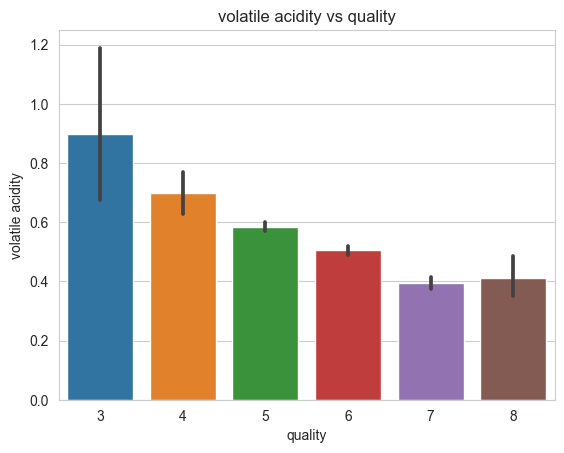

In [12]:
sns.barplot(y='volatile acidity', x='quality', data = wine_df);
plt.title("volatile acidity vs quality");

Inference : <br>
`volatile acidity` : These are essentially the waste products of the saprophytes. Among these waste products are short-chain fatty acids such as acetic, propionic and butyric acids. These are called volatile acids because they can be distilled at atmospheric pressure.<br>
`volatile acidity` `decreases` with `increase` in quality.<br>
<br> So Overall `volatile acidity` is usefull when predicting the Quality.

### Parameter 4 : `citric acid`

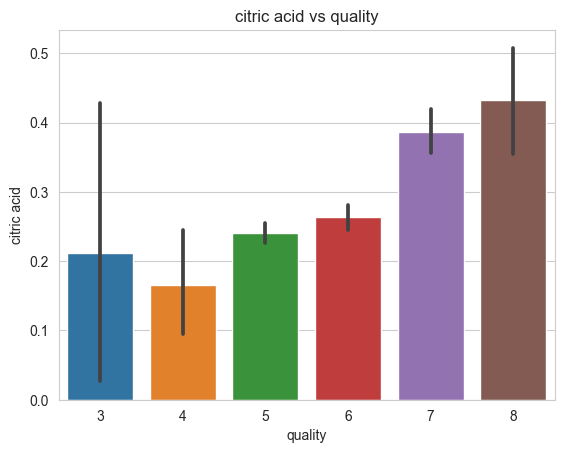

In [13]:
sns.barplot(y='citric acid', x='quality', data = wine_df);
plt.title("citric acid vs quality");

Inference : <br>
`citric acid` `increases` with `increase` in quality.<br>
<br> So Overall `volatile acidity` is usefull when predicting the Quality.

### Parameter 5 : `pH`

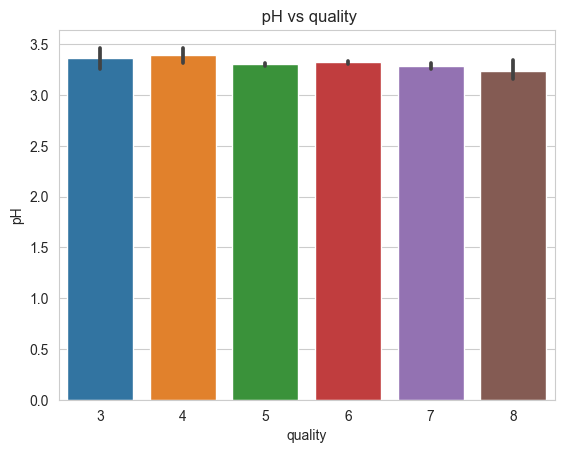

In [14]:
sns.barplot(y='pH', x='quality', data = wine_df);
plt.title(" pH vs quality");

Inference:<br>
Overall pH level of the wine data frame is constant and in range 3.25 to 3.40
<br> Hence, the nature of the wine is Acidic and the quality does not depend upon the overall pH value

## Effect of Density and the Residual Sugar of wine on the Quality

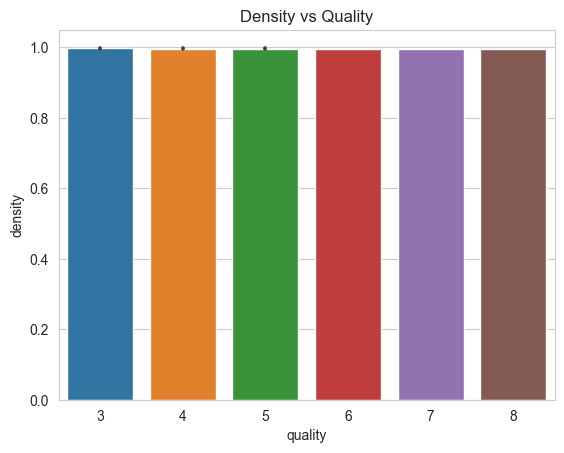

In [15]:
sns.barplot(y='density', x='quality', data = wine_df);
plt.title("Density vs Quality");

Inference : 
<br> Quality of Wine is Independent of the Density as can be seen from the bar plot.
<br> Density is constant, value = 1.0 approx. and does not affect the quality

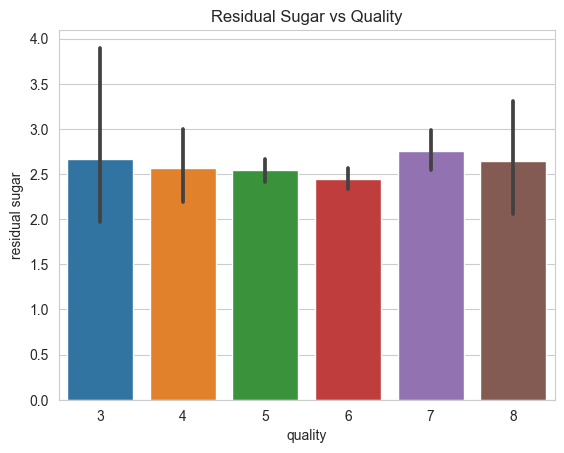

In [16]:
sns.barplot(y='residual sugar', x='quality', data = wine_df);
plt.title("Residual Sugar vs Quality");

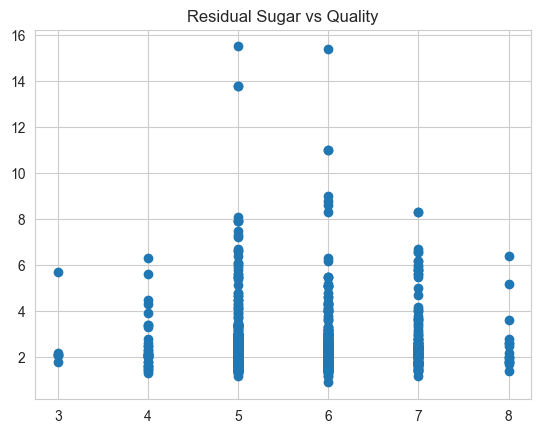

In [17]:
plt.scatter(   y= 'residual sugar',
                x= 'quality',
                data = wine_df);
plt.title("Residual Sugar vs Quality");

Inference : 
<br> Residual Sugar of Wine is Independent of the Density as can be seen from the bar plot.
<br> Residual Sugar is constant and does not affect the quality

## Effect of Chloride

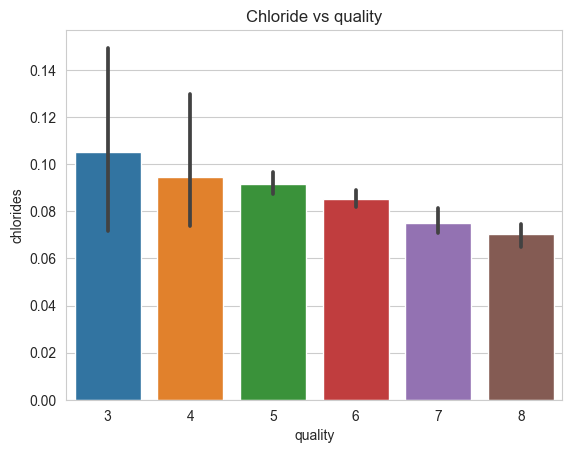

In [18]:
sns.barplot(y='chlorides', x='quality', data = wine_df);
plt.title("Chloride vs quality");

Inference : 
<br> Chloride curve has an -ve slope i.e. quality increases with linear decrease of chloride content 

## Effect of Alcohol

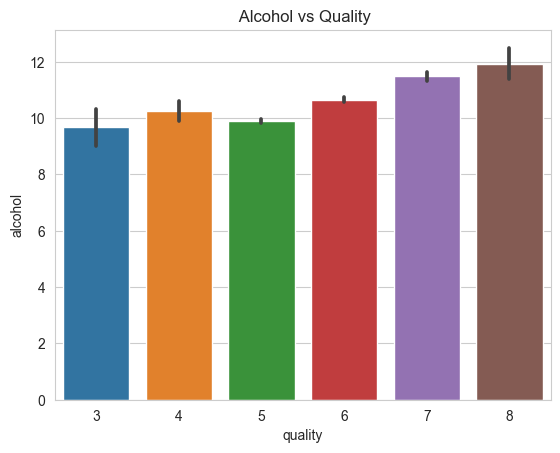

In [19]:
sns.barplot(y='alcohol', x='quality', data = wine_df);
plt.title(" Alcohol vs Quality");

Inference : 
<br> Alcohol curve has an +ve slope i.e. quality increases with linear increase of alcohol present in the wine

## Effect of Sulphates

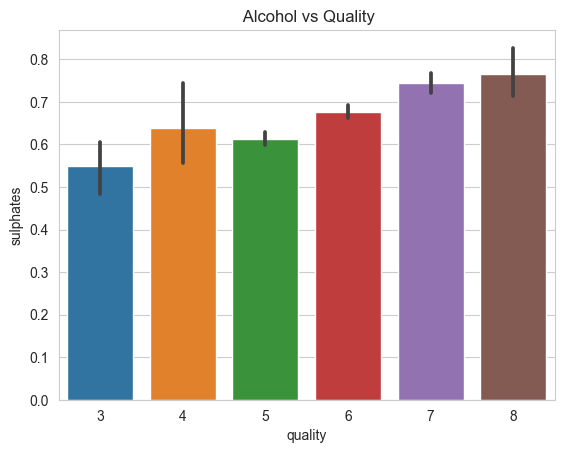

In [20]:
sns.barplot(y='sulphates', x='quality', data = wine_df);
plt.title(" Alcohol vs Quality");

Overall trend can be seen as that of increasing quality with increasing sulphate content

## Effect of Sulfur dioxides

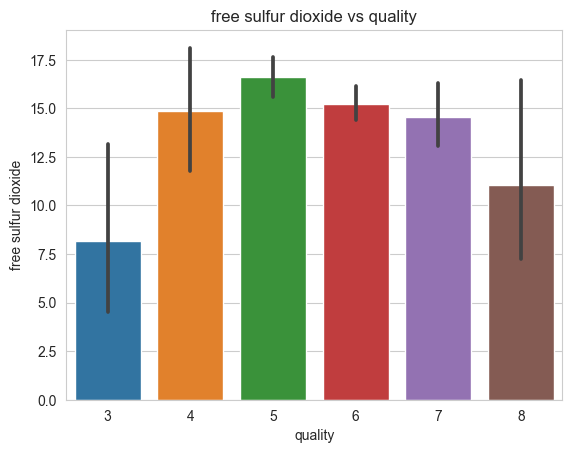

In [21]:
sns.barplot(y='free sulfur dioxide', x='quality', data = wine_df);
plt.title("free sulfur dioxide vs quality");

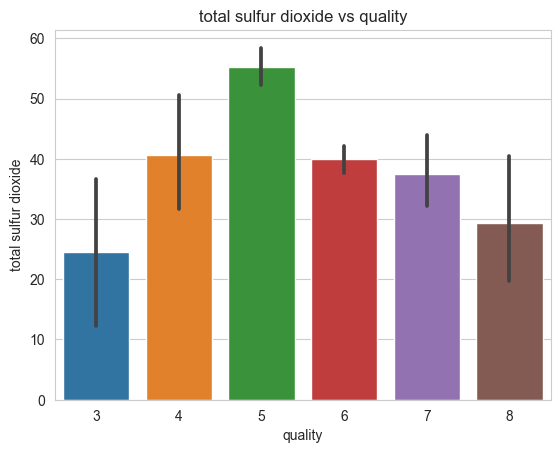

In [22]:
sns.barplot(y='total sulfur dioxide', x='quality', data = wine_df);
plt.title("total sulfur dioxide vs quality");

As it can be seen that in both the sulfur dioxide bar charts the quality increases with increase in sulfur dioxide content but after a certain point the quality only increases if the sulfur dioxide content is decreased

In [23]:
correlation = wine_df.corr()

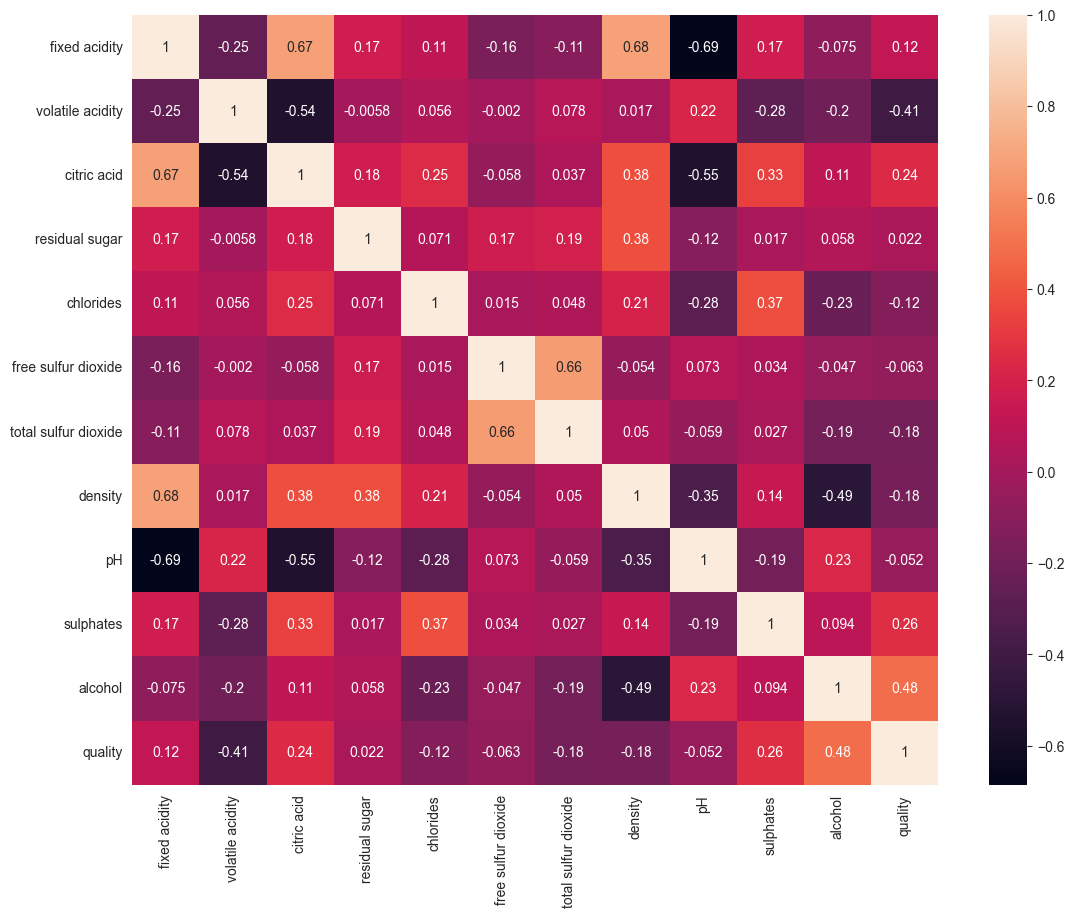

In [28]:
plt.figure(figsize = (13,10))
sns.heatmap(correlation, annot = True);

In [25]:
wine1_df = wine_df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']]

In [26]:
correlation = wine1_df.corr()

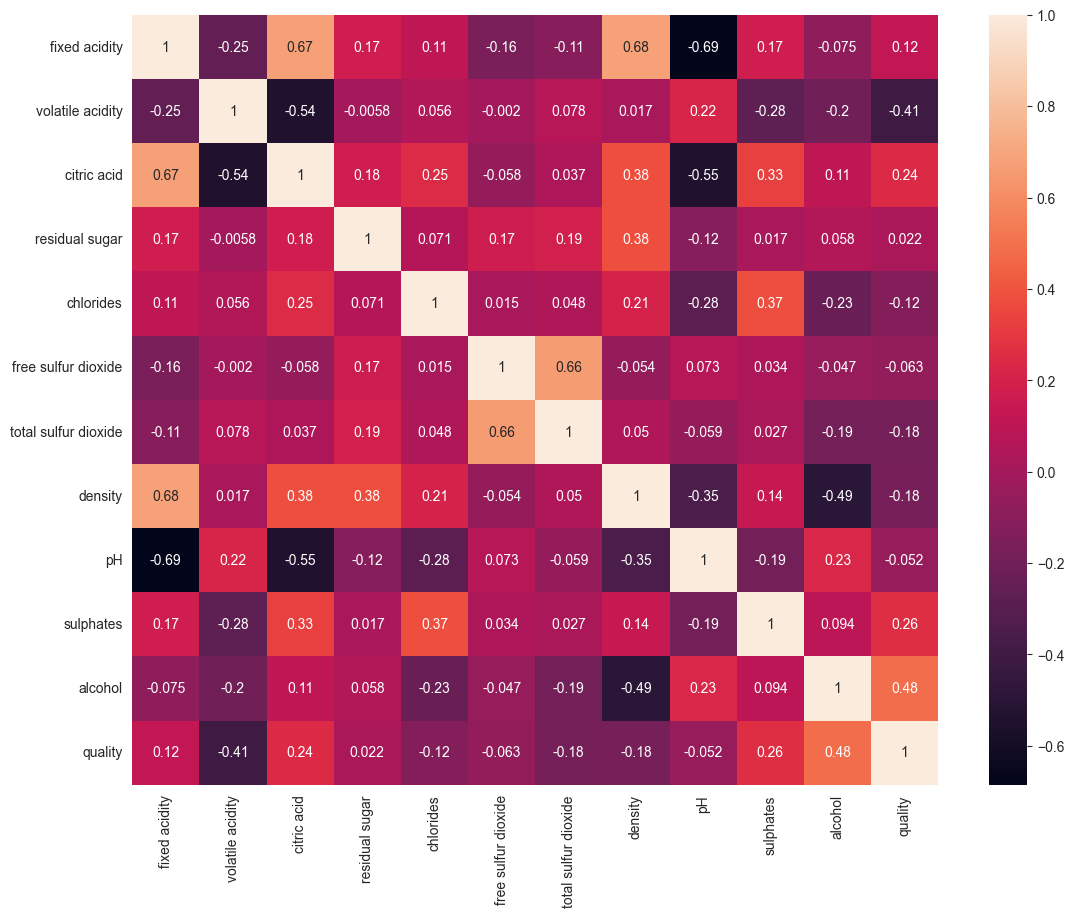

In [29]:
plt.figure(figsize = (13,10))
sns.heatmap(correlation, annot = True);

Normalization Formula = (v - vmin) / (vmax - vmin)

In [32]:
free_series = wine_df['free sulfur dioxide']
free_series

0       11.0
1       25.0
2       15.0
3       17.0
4       11.0
        ... 
1138    29.0
1139    28.0
1140    32.0
1141    39.0
1142    32.0
Name: free sulfur dioxide, Length: 1143, dtype: float64

In [33]:
norm_free = (free_series - free_series.min())/(free_series.max() - free_series.min()) 

In [34]:
norm_free

0       0.149254
1       0.358209
2       0.208955
3       0.238806
4       0.149254
          ...   
1138    0.417910
1139    0.402985
1140    0.462687
1141    0.567164
1142    0.462687
Name: free sulfur dioxide, Length: 1143, dtype: float64

In [36]:
total_series = wine_df['total sulfur dioxide']

In [37]:
norm_total = (total_series - total_series.min())/(total_series.max() - total_series.min()) 

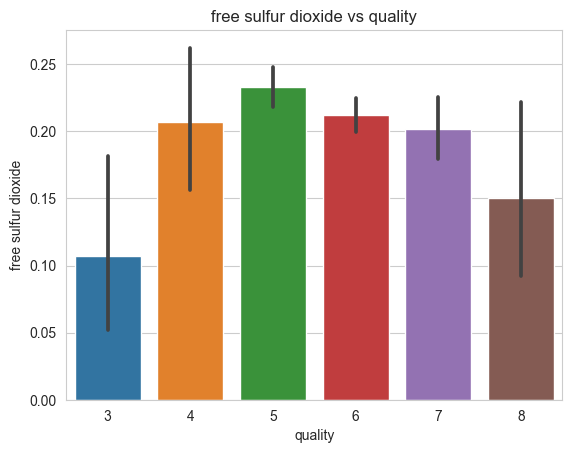

In [39]:
sns.barplot(y=norm_free, x='quality', data=wine_df);
plt.title("free sulfur dioxide vs quality");

# Final Inferece

## Factors which does not have much effect on the Quality
Id
<br> Fixed Acidity
<br> pH
<br> Density
<br> Residual Sugar
<br>

## Factors which effect the Quality
<br>volatile acidity
<br>citric acid
<br>chlorides
<br>alcohol
<br>sulphates
<br>free sulfur dioxide
<br>total sulfur dioxide